In [1]:
#Importing all of our libraries in one shot:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor, ExtraTreesRegressor, BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostRegressor
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import metrics
from sklearn.base import BaseEstimator
from sklearn.svm import SVC, SVR 
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator

In [2]:
#Reading in the data we just stored:

%store -r df
%store -r preds

In [45]:
df.head(50)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,4.025352,12.754289,5,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3.332205,11.474455,9,0,0,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3.496508,12.433686,13,7688,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3.258097,12.090325,13,0,0,45,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3.688879,10.947204,14,14084,0,55,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,4.189655,12.556803,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,3.401197,12.672159,11,0,0,35,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3.761200,13.030765,14,0,0,50,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,4.025352,12.407400,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,3.367296,11.828196,9,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
#Defining our Xs and ys:

X = df.drop(['wage'], axis = 1)
y = df['wage']

In [5]:
#Instantiating StandardScaler:

ss = StandardScaler()

In [6]:
#Fitting and transforming our X

ss.fit_transform(X)

array([[ 1.21020085,  1.20274566, -1.95761158, ...,  0.34861264,
        -0.03508772, -0.02147849],
       [-0.70529478, -0.83610079, -0.41289103, ...,  0.34861264,
        -0.03508772, -0.02147849],
       [-0.25124723,  0.69200717,  1.13182952, ...,  0.34861264,
        -0.03508772, -0.02147849],
       ...,
       [-0.42402074,  1.35674103, -0.02671089, ...,  0.34861264,
        -0.03508772, -0.02147849],
       [-0.08864292,  1.37444309,  1.13182952, ...,  0.34861264,
        -0.03508772, -0.02147849],
       [ 0.28036788,  0.50479495,  1.13182952, ...,  0.34861264,
        -0.03508772, -0.02147849]])

In [7]:
ss.transform(preds)

array([[-1.01847589,  0.52974894, -1.1852513 , ...,  0.34861264,
        -0.03508772, -0.02147849],
       [ 0.13862009, -0.94595582, -0.41289103, ...,  0.34861264,
        -0.03508772, -0.02147849],
       [-0.70529478,  1.16037578,  0.74564938, ...,  0.34861264,
        -0.03508772, -0.02147849],
       ...,
       [ 0.13862009,  1.3307421 ,  1.13182952, ...,  0.34861264,
        -0.03508772, -0.02147849],
       [ 0.54375528, -1.05463804,  1.13182952, ...,  0.34861264,
        -0.03508772, -0.02147849],
       [-0.08864292,  0.18045919,  1.13182952, ...,  0.34861264,
        -0.03508772, -0.02147849]])

In [48]:
#We're going to create a custom Base Estimator that can switch between different classifiers:

class BaseEstimator(BaseEstimator):

    def __init__(
        self, 
        estimator = SGDClassifier(),
    ):
        self.estimator = estimator


    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)


    def predict_proba(self, X):
        return self.estimator.predict_proba(X)


    def score(self, X, y):
        return self.estimator.score(X, y)

In [9]:
#Creating one giant pipeline with multiple models in it:
pipe_params = [
    {
        'model__estimator': [LogisticRegression()],
        'model__estimator__penalty': ['l1', 'l2']
    },
    {
        'model__estimator': [RandomForestClassifier()],
        'model__estimator__min_samples_split': [2, 3],
        'model__estimator__min_samples_leaf' : [7, 8, 9],
        'model__estimator__n_estimators' : [115, 120, 125]
    },
    {
        'model__estimator': [AdaBoostClassifier()],
        'model__estimator__n_estimators': [50, 60, 70],
        'model__estimator__learning_rate' : [1, 2],
        'model__estimator__algorithm' : ['SAMME', 'SAMME.R']
    },
     {
        'model__estimator': [KNeighborsClassifier()],
        'model__estimator__n_neighbors' : [77, 79, 81, 83, 85],
        'model__estimator__p': [1, 2],
        'model__estimator__leaf_size' : [10, 20, 30, 40],
    },
     {
        'model__estimator': [BaggingClassifier()],
        'model__estimator__n_estimators': [230, 240, 250],
        'model__estimator__bootstrap' : [True, False],
        'model__estimator__max_samples' : [35, 40, 45],
        'model__estimator__max_features' : [55, 60, 65]
     },
     {
        'model__estimator': [SVC()],
        'model__estimator__degree' : [2, 3, 4],
        'model__estimator__C' : [10, 15, 20, 100, 150, 200],

     },
#       {
#       'model__estimator': [GaussianNB()]
#    },
]

In [47]:
#I'm going to write a function that will do our model analysis for us with one line of code. This will be much easier than going through and 
#changing everything manually:

def model_analyze(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    pipe = Pipeline([('model', BaseEstimator())])
    
    gs = GridSearchCV(pipe, pipe_params, cv = 5, verbose = 3, n_jobs = 4)
    gs.fit(X_train, y_train)
    
    print(f'Training Data Score: {gs.score(X_train, y_train)}')
    print(f'Testing Data Score: {gs.score(X_test, y_test)}')
    print(f'Cross Val Score: {gs.best_score_}')
    print(f'Best Params: {gs.best_params_}')

In [11]:
model_analyze(X, y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   14.9s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:   33.5s
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  2.3min finished


Training Data Score: 0.8637015781922525
Testing Data Score: 0.8592501536570375
Cross Val Score: 0.8503776796973519
Best Params: {'model__estimator': RandomForestClassifier(min_samples_leaf=7, min_samples_split=3,
                       n_estimators=125), 'model__estimator__min_samples_leaf': 7, 'model__estimator__min_samples_split': 3, 'model__estimator__n_estimators': 125}


In [13]:
#Our best performing model is Random Forest Classififer, so let's use that to predict:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
rf = RandomForestClassifier(n_estimators = 125, min_samples_leaf = 7)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_train)

In [52]:
#Checking our cross val scores:

cvs = cross_val_score(rf, X_train, y_train, cv = 5).mean() #We ended up not using a cross val score.
print(rf.score(X_test, y_test))

0.8635525507068224


In [16]:
#Checking our test data set:

test_proba = [i[1] for i in rf.predict_proba(X_test)]

testdf = pd.DataFrame({'True_Values': y_test, 'Predicted_Prob' : test_proba})

In [17]:
testdf.head(50)

,True_Values,Predicted_Prob
3398,0,0.525633
4916,0,0.039690
4822,0,0.192939
3439,1,0.628778
96,1,0.861727
3362,0,0.005993
4220,0,0.088742
5568,1,0.323893
6206,0,0.168198
3021,0,0.163187


In [18]:
#Creating a dataframe of the predicted results first
#Then we will be picking the columns where probs = 1
#Finally, writing everything to a results.csv file:

probs = rf.predict_proba(preds)

In [19]:
df_probs = pd.DataFrame(probs)

In [20]:
df_probs.head()

,0,1
0,0.995168,0.004832
1,0.694618,0.305382
2,0.716975,0.283025
3,0.227147,0.772853
4,0.994234,0.005766


In [21]:
df_probs.columns=['anti-wage', 'wage']

In [22]:
df_probs.head()

,anti-wage,wage
0,0.995168,0.004832
1,0.694618,0.305382
2,0.716975,0.283025
3,0.227147,0.772853
4,0.994234,0.005766


In [23]:
results = pd.DataFrame(df_probs['wage'])

In [24]:
results.head()

,wage
0,0.004832
1,0.305382
2,0.283025
3,0.772853
4,0.005766


In [25]:
#Saving our results to a CSV

results.to_csv('./data/results.csv', index = False)

## Visualizations:

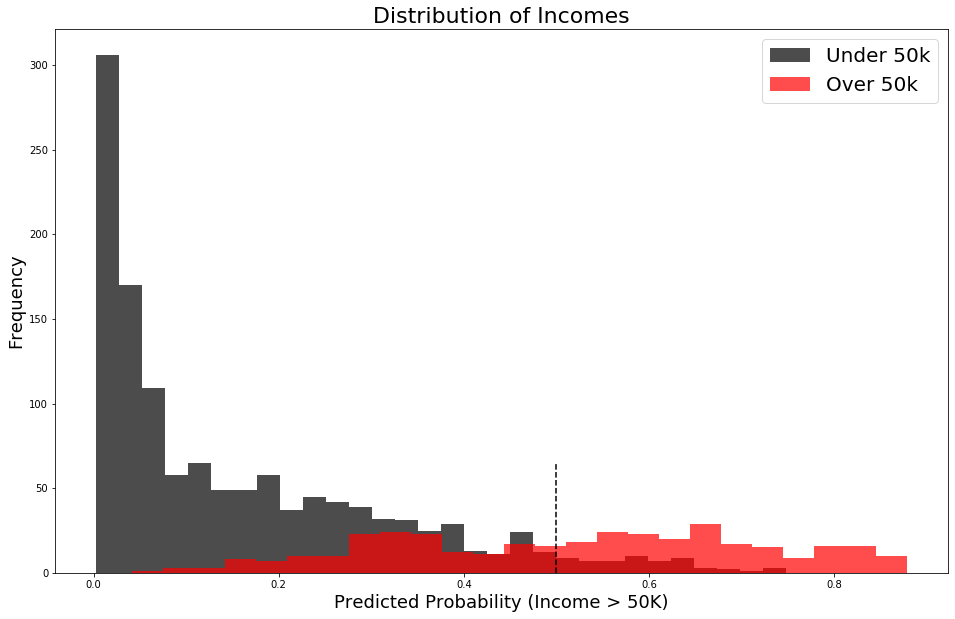

In [44]:
#Here we'll create two histograms of our observaions:

plt.figure(figsize = (16, 10))
plt.hist(testdf[testdf['True_Values'] == 0]['Predicted_Prob'],
         bins=30,
         color='black',
         alpha = 0.7,
         label='Under 50k')
plt.hist(testdf[testdf['True_Values'] == 1]['Predicted_Prob'],
         bins=25,
         color='red',
         alpha = 0.7,
         label='Over 50k')

# Axis Labels:
plt.title('Distribution of Incomes', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability (Income > 50K)', fontsize=18)
plt.vlines(x=0.5,
           ymin = 0,
           ymax = 65,
           color='black',
           linestyle = '--')

# Creating a legend:
plt.legend(fontsize=20);

/Users/anshul/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


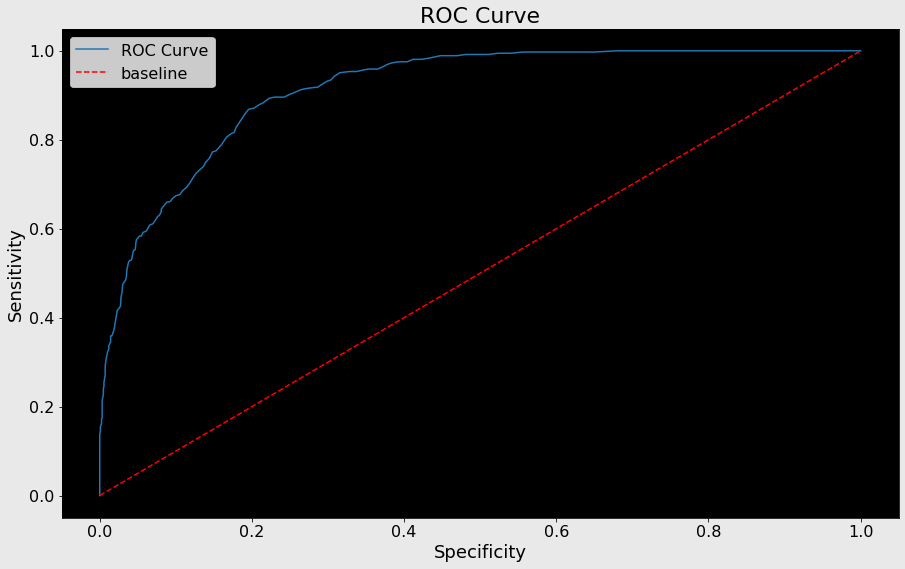

In [54]:
# Let's create a ROC Curve:
fig = plt.figure(figsize = (15, 9))
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.7)

# Thresholds:
thresholds = np.linspace(0, 1, 200)

# Function to calculate sensitivity:
def tpr(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)

# Function to calculate specificity:
def fpr(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))

# Calculate sensitivity and 1-specificity:
tpr_values = [tpr(testdf, 'True_Values', 'Predicted_Prob', prob) for prob in thresholds]
fpr_values = [fpr(testdf, 'True_Values', 'Predicted_Prob', prob) for prob in thresholds]

# Plotting our ROC Curve:
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')
ax = fig.add_subplot(111)
ax.patch.set_facecolor('#000000')
ax.patch.set_alpha(1)

# Baseline plot:
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--',
         color='red')

# Axis Labels:
plt.title('ROC Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('Specificity', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Creating a legend:
plt.legend(fontsize=16);